# Продуктовая аналитика

## Практическое задание 1

### Общая информация
Дата выдачи: XX.02.2024

Мягкий дедлайн: 23:59MSK XX.XX.2024

Жесткий дедлайн: 23:59MSK XX.XX.2024

### О задании
В этом задании вам предстоит приобрести (или освежить) навыки предварительного анализа данных, которые пригождаются продуктовым аналитикам чуть ли не ежедневно.

Вы также познакомитесь с разными библиотеками визуализации и модулем `scipy.stats`!

### Подключение библиотек

In [103]:
# установите все зависимости
!pip install folium scipy numpy pandas seaborn matplotlib statsmodels

In [104]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import statsmodels as sm

import matplotlib.pyplot as plt
import seaborn as sns
import folium

from pathlib import Path

In [105]:
# распакуйте архив с данными
!wget -O 'airbnb_listings.zip' -q 'https://www.dropbox.com/scl/fi/cfi6na5uf6zm86uh1916n/airbnb_listings.zip?rlkey=c1uzvj0t6d1ykd11y4u24zkui&dl=0'
!unzip airbnb_listings.zip

Archive:  airbnb_listings.zip
replace airbnb_listings/berlin_weekdays.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


## Часть 1. Графики и статистики

Мы будем работать с [предложениями аренды в сервисе Airbnb](https://zenodo.org/records/4446043#.ZEV8d-) в городах Европы - сегодня это Амстердам, Лондон, Париж и Берлин. Архив с файлами приложен к домашнему заданию, а структуру таблиц и значение каждой из колонок можно почитать в первоисточнике.

**Airbnb** - это маркетплейс с предложениями посуточной аренды для туристических и деловых поездок, который соединяет арендатора и арендодателя. Вам предстоит изучить, как устроено ценообразование на этом маркетплейсе.

**Задание 1 (0.5 балла).**

Считайте данные из папки *airbnb_listings* и объедините их в один *pd.Dataframe*.

*Совет: не забудьте сохранить информацию о городе и другие полезные знания из названий файлов.*

In [106]:
filepaths = list([str(p) for p in Path('airbnb_listings').glob('*')])
filepaths

['airbnb_listings/amsterdam_weekdays.csv',
 'airbnb_listings/london_weekdays.csv',
 'airbnb_listings/paris_weekends.csv',
 'airbnb_listings/amsterdam_weekends.csv',
 'airbnb_listings/paris_weekdays.csv',
 'airbnb_listings/berlin_weekends.csv',
 'airbnb_listings/london_weekends.csv',
 'airbnb_listings/berlin_weekdays.csv']

In [107]:
cities = ['amsterdam', 'paris', 'london', 'berlin']
daytypes = ['weekdays', 'weekends']

# Read the files into dataframes
dfs = [pd.read_csv(f) for f in filepaths]

# Combine the list of dataframes
data = pd.concat(dfs, ignore_index=True)

# Add a new column
data['city'] = np.repeat([f'S{i}' for i in range(len(dfs))], [len(data) for data in dfs])
data['daytype'] = np.repeat([f'S{i}' for i in range(len(dfs))], [len(data) for data in dfs])

data['city'].replace('S0', cities[0], inplace=True)
data['city'].replace('S1', cities[2], inplace=True)
data['city'].replace('S2', cities[1], inplace=True)
data['city'].replace('S3', cities[0], inplace=True)
data['city'].replace('S4', cities[1], inplace=True)
data['city'].replace('S5', cities[3], inplace=True)
data['city'].replace('S6', cities[1], inplace=True)
data['city'].replace('S7', cities[3], inplace=True)

data['daytype'].replace('S0', daytypes[1], inplace=True)
data['daytype'].replace('S1', daytypes[0], inplace=True)
data['daytype'].replace('S2', daytypes[1], inplace=True)
data['daytype'].replace('S3', daytypes[1], inplace=True)
data['daytype'].replace('S4', daytypes[0], inplace=True)
data['daytype'].replace('S5', daytypes[1], inplace=True)
data['daytype'].replace('S6', daytypes[0], inplace=True)
data['daytype'].replace('S7', daytypes[0], inplace=True)

# data  = list()
# for i, f in filepaths:
#     cur_data = pd.read_csv(f)
#     data['file'] = f'File {i}'
#     cur_data['file'] = f.stem
#     data.append(cur_data)
# df = pd.concat(data, ignore_index=True)

In [108]:
data

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,daytype
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,weekends
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,weekends
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,weekends
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,weekends
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,weekends
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21240,1279,232.074413,Private room,False,True,2.0,False,1,0,10.0,...,3.482221,0.509602,91.587227,13.964286,122.168375,25.190282,13.45614,52.50351,berlin,weekdays
21241,1280,175.049079,Entire home/apt,False,False,2.0,False,0,0,10.0,...,11.002848,2.377031,34.425382,5.248831,44.454457,9.166205,13.50477,52.44047,berlin,weekdays
21242,1281,158.689352,Entire home/apt,False,False,2.0,False,0,0,9.0,...,11.313156,2.531878,33.429196,5.096943,43.200491,8.907645,13.51031,52.43937,berlin,weekdays
21243,1282,134.617182,Private room,False,True,4.0,False,1,0,10.0,...,15.166191,2.754843,25.439056,3.878688,33.027075,6.809957,13.53301,52.40712,berlin,weekdays


Колонки *multi*, *biz*, *room_shared* и *room_private* дублируют информацию из других колонок - удалим их.

In [109]:
data.drop(columns=['multi', 'biz', 'room_shared', 'room_private'], inplace=True)

In [110]:
data

,Unnamed: 0,realSum,room_type,person_capacity,host_is_superhost,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,daytype
0,0,194.033698,Private room,2.0,False,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,weekends
1,1,344.245776,Private room,4.0,False,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,weekends
2,2,264.101422,Private room,2.0,False,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,weekends
3,3,433.529398,Private room,4.0,False,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,weekends
4,4,485.552926,Private room,2.0,True,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,weekends
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21240,1279,232.074413,Private room,2.0,False,10.0,96.0,1,3.482221,0.509602,91.587227,13.964286,122.168375,25.190282,13.45614,52.50351,berlin,weekdays
21241,1280,175.049079,Entire home/apt,2.0,False,10.0,100.0,1,11.002848,2.377031,34.425382,5.248831,44.454457,9.166205,13.50477,52.44047,berlin,weekdays
21242,1281,158.689352,Entire home/apt,2.0,False,9.0,91.0,1,11.313156,2.531878,33.429196,5.096943,43.200491,8.907645,13.51031,52.43937,berlin,weekdays
21243,1282,134.617182,Private room,4.0,False,10.0,93.0,1,15.166191,2.754843,25.439056,3.878688,33.027075,6.809957,13.53301,52.40712,berlin,weekdays


**Задание 2 (0.5 балл).**
Посмотрим на датасеты!

В данных есть категориальные переменные - те, в которых присутствует конечное множество значений.
Выберите категориальные переменные из всех и задайте им тип **category**.

In [111]:
numerical_columns = [
    'Unnamed: 0', 'realSum', 'guest_satisfaction_overall', 'bedrooms', 'dist',
    'metro_dist', 'attr_index',	'attr_index_norm',	'rest_index',
    'rest_index_norm', 'lng',	'lat'
]
categorical_columns = [
    'room_type', 'person_capacity', 'host_is_superhost', 'cleanliness_rating', 'city', 'daytype'
]

In [112]:
for col in numerical_columns:
    data[col] = data[col].astype(float)

for col in categorical_columns:
    data[col] = data[col].astype('category')

In [113]:
len(numerical_columns)

12

In [114]:
len(categorical_columns)

6

In [115]:
data.columns

Index(['Unnamed: 0', 'realSum', 'room_type', 'person_capacity',
       'host_is_superhost', 'cleanliness_rating', 'guest_satisfaction_overall',
       'bedrooms', 'dist', 'metro_dist', 'attr_index', 'attr_index_norm',
       'rest_index', 'rest_index_norm', 'lng', 'lat', 'city', 'daytype'],
      dtype='object')

In [116]:
# проверим, что ни одна переменная не потерялась
assert len(numerical_columns) + len(categorical_columns) == len(data.columns)

**Вопрос:** всем ли колонкам можно однозначно определить тип? Когда может быть важно рассматривать, как их рассматривать?

**Ответ:** Нет, однозначно определить тип всем нельзя. Например, person_capacity и cleanliness_rating мы можем определить в любой тип, т.к. по определению они подходят и туда, и туда.

**Задание 3 (1 балл).**

Для категориальных переменных посчитайте частоты каждого значения и постройте гистограммы.
- Для подсчета частот воспользуйтесь [groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) или [value_counts](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html).
- Постарайтесь подсчитать и сохранить частоты в какой-либо структуре данных - они вам еще пригодятся.
- Для построения гистограмм воспользуйтесь [sns.histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) или [plt.hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html).
- Экспериментируйте!

In [117]:
global frequencies
frequencies = []

for col in categorical_columns:
    # data.groupby(['room_type']).mean
    vals = data.value_counts([col])
    for val in vals:
        frequencies.append(val)
frequencies

[11459,
 9559,
 227,
 12691,
 4542,
 1997,
 1259,
 756,
 17501,
 3744,
 11143,
 6660,
 2358,
 605,
 277,
 87,
 71,
 40,
 4,
 12067,
 4614,
 2484,
 2080,
 14407,
 6838]

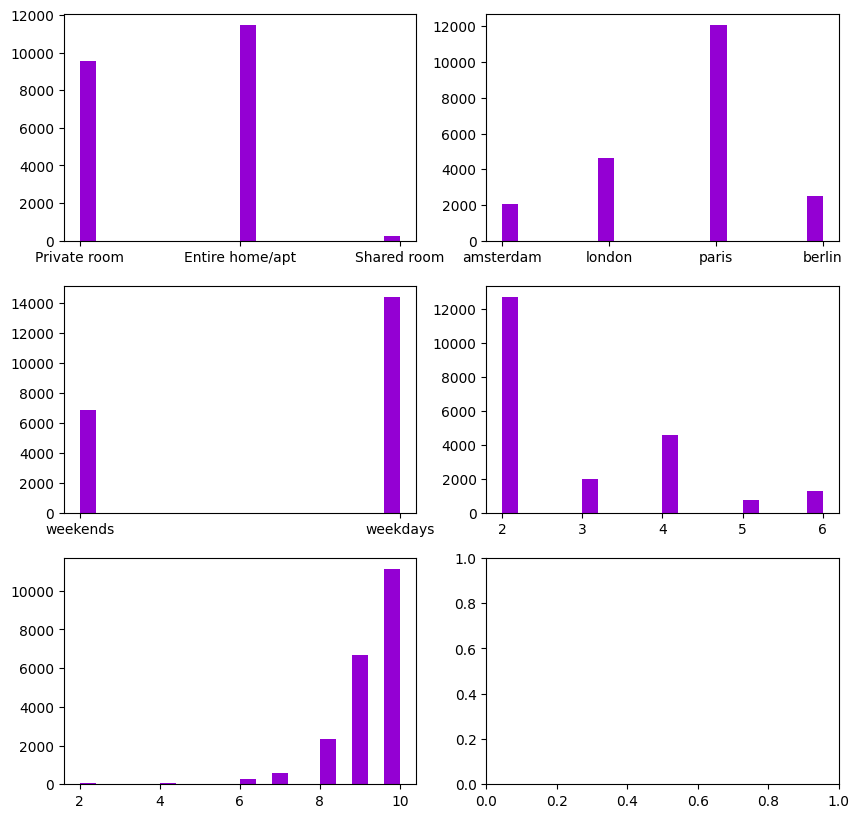

In [118]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
# axes[0,0].title('Frequency', color='purple')
axes[0,0].hist(data['room_type'], bins=20, color='darkviolet')
axes[0,1].hist(data['city'], bins=20, color='darkviolet')
axes[1,0].hist(data['daytype'], bins=20, color='darkviolet')
axes[1,1].hist(data['person_capacity'], bins=20, color='darkviolet')
axes[2,0].hist(data['cleanliness_rating'], bins=20, color='darkviolet')
# axes[2,1].hist(data['host_is_superhost'], bins=20, color='darkviolet')
plt.show()

Кажется, для колонок *bedrooms* и *room_type* некоторые группы имеют очень мало примеров - менее пяти процентов. К нашему счастью, можно объединить эти значения в группы покрупнее, при этом сохранив "физический смысл".

Так, для типов размещения "общая комната" и "личная комната" логично объединить их в тип "комната".
Проведите укрупнение колонки *room_type* и любой другой категориальной, опишите, почему вы выбрали именно такую группировку.

*Подсказка:* почитайте про колонку и возможные значения в первоисточнике. А еще воспользуйтесь классом *Mapper* - он может помочь вам писать меньше дублирующегося кода.

**Ответ:**

In [119]:
class Mapper(dict):
    def __init__(self, default):
      super().__init__()
      self.default = default

    def __missing__(self, key):
      return self.default


mapper = Mapper(default='room')
mapper |= {'Private room': 'room', 'Entire home/apt': 'entire home/apt'}

data['room_type'] = data['room_type'].map(mapper).astype('category')

In [120]:
mapper = Mapper(default='2')
mapper |= {2.0: '2', 3.0: '3', 4.0: '4', 5.0: '5-6', 6.0: '5-6'}

data['person_capacity'] = data['person_capacity'].map(mapper).astype('category')

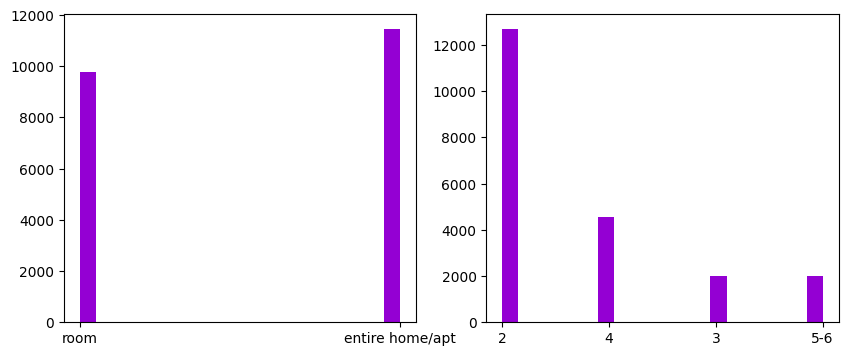

In [121]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4))
axes[0].hist(data['room_type'], bins=20, color='darkviolet')
axes[1].hist(data['person_capacity'], bins=20, color='darkviolet')
plt.show()

**Задание 4 (1 балл).**

Для цены (колонка **realSum**) рассчитайте описательные статистики:
  - среднее, медиана;
  - квартили и межквартильный размах;
  - стандартное отклонение;
  - минимум, максимум;
  - перекос (skew), эксцесс (curtosis);

In [122]:
def get_statistics(x: pd.Series):
    mean = x.mean()
    std = x.std()

    # Квартили и межквартильный размах
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1

    # Стандартное отклонение
    std_dev = x.std()

    # Минимум и максимум
    min_val = x.min()
    max_val = x.max()

    # Перекос и эксцесс
    skewness = x.skew()
    kurtosis = x.kurtosis()

    return {
        'mean': mean,
        'std': std,
        'q1' : q1,
        'q3' : q3,
        'dev' : std_dev,
        'min_val' : min_val,
        'max_val' : max_val,
        'skewness' : skewness,
        'kurtosis' : kurtosis
    }

pd.Series(get_statistics(data['realSum']))

mean          378.772697
std           411.809812
q1            193.560526
q3            452.278870
dev           411.809812
min_val        54.328653
max_val     16445.614689
skewness       15.721518
kurtosis      452.469593
dtype: float64

Сделайте это для всех числовых переменных:

In [123]:
pd.Series(get_statistics(data['guest_satisfaction_overall']))

mean         91.892634
std           9.912800
q1           89.000000
q3           99.000000
dev           9.912800
min_val      20.000000
max_val     100.000000
skewness     -2.916452
kurtosis     13.838560
dtype: float64

In [124]:
pd.Series(get_statistics(data['bedrooms']))

mean        1.088868
std         0.621063
q1          1.000000
q3          1.000000
dev         0.621063
min_val     0.000000
max_val     9.000000
skewness    1.293562
kurtosis    6.882722
dtype: float64

In [125]:
pd.Series(get_statistics(data['dist']))

mean         4.339737
std          2.739123
q1           2.379844
q3           5.609263
dev          2.739123
min_val      0.015045
max_val     25.284557
skewness     1.439692
kurtosis     3.552852
dtype: float64

In [126]:
pd.Series(get_statistics(data['metro_dist']))

mean         0.748950
std          1.067890
q1           0.214866
q3           0.761259
dev          1.067890
min_val      0.003220
max_val     14.273577
skewness     3.591623
kurtosis    17.004006
dtype: float64

In [127]:
pd.Series(get_statistics(data['attr_index']))

mean         295.995606
std          179.357264
q1           170.989289
q3           384.846606
dev          179.357264
min_val       15.152201
max_val     2056.552199
skewness       1.626220
kurtosis       5.856192
dtype: float64

In [128]:
pd.Series(get_statistics(data['attr_index_norm']))

mean         18.750417
std          10.666172
q1           11.716738
q3           23.170498
dev          10.666172
min_val       2.164941
max_val     100.000000
skewness      2.053442
kurtosis      7.455391
dtype: float64

In [129]:
pd.Series(get_statistics(data['rest_index']))

mean         602.968748
std          385.350447
q1           334.617394
q3           810.284808
dev          385.350447
min_val       19.576924
max_val     5587.136047
skewness       1.634892
kurtosis       7.465769
dtype: float64

In [130]:
pd.Series(get_statistics(data['rest_index_norm']))

mean         24.832105
std          18.805820
q1            9.312911
q3           36.353977
dev          18.805820
min_val       2.515094
max_val     100.000000
skewness      1.037844
kurtosis      0.369204
dtype: float64

In [131]:
pd.Series(get_statistics(data['lng']))

mean         2.729104
std          4.198294
q1          -0.113000
q3           2.382960
dev          4.198294
min_val     -0.251700
max_val     13.711850
skewness     1.786930
kurtosis     1.988195
dtype: float64

In [132]:
pd.Series(get_statistics(data['lat']))

mean        50.874509
std          1.410209
q1          48.880670
q3          51.546610
dev          1.410209
min_val     48.819940
max_val     52.641410
skewness    -0.572148
kurtosis    -1.346985
dtype: float64

**Вопрос:** для всех ли переменных распределение несет какой-то смысл? Почему да / нет?

**Ответ:** не для всех - например, для координат они достаточно бесполезны, так как у нас дополнительно разброс по городам. У нас очень часто присутствуют выбросы.

**Задание 5 (0.5 балл).**

Распределение широты и долготы - это малополезная информация. Давайте лучше визуализируем информацию о местоположении так, как мы привыкли её видеть - например, при помощи карты. С этим нам поможет библиотека **folium**.

Постройте хитмап (тепловую диаграмму) бронирований для одного из городов.

In [133]:
import folium
from folium.plugins import HeatMap
from folium import plugins

In [235]:
center_coordinates = [51.503367, -0.114830]
m = folium.Map(center_coordinates, zoom_start=10)
heat_data = [[row['lat'], row['lng']] for index, row in data.iterrows()]
m.add_child(plugins.HeatMap(heat_data))

In [134]:
center_coordinates = [51.503367, -0.114830]
m = folium.Map(center_coordinates, zoom_start=10)
London_data = data[data['city'] == 'london']
heat_data = [[row['lat'], row['lng']] for index, row in London_data.iterrows()]
m.add_child(plugins.HeatMap(heat_data))

In [135]:
m

Геоданные, такие как координаты, могут быть очень полезны в исследованиях, но сегодня мы остановимся на этой карте и использовании двух переменных, которые уже были рассчитаны для нас - расстоянии до центра города и расстоянии до ближайшей станции метро.

## Часть 2. Связь цены и других факторов

**Задание 6 (1 балл).**

Посмотрим, как зависит цена от других переменных.
Для колонок *dist* и *metro_dist* и цены бронирования постройте диаграммы рассеяния.

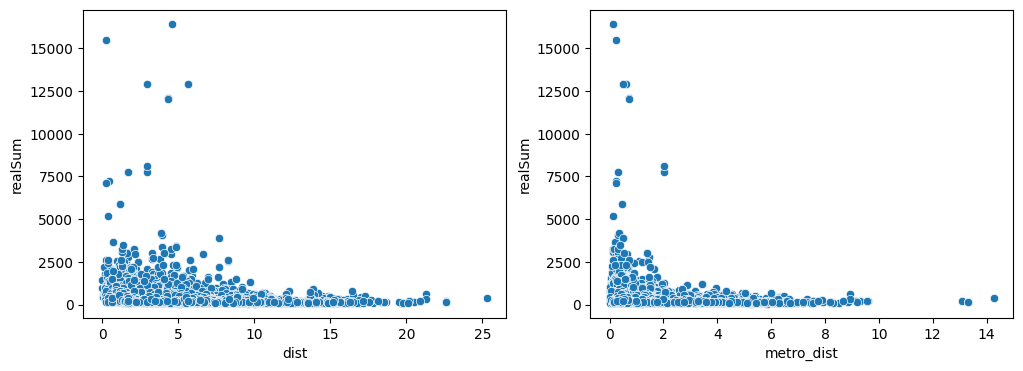

In [137]:
dist_cols = ['dist', 'metro_dist']

fig, axes = plt.subplots(ncols=2, figsize=(12, 4))

for i, col in enumerate(dist_cols):
    sns.scatterplot(x=data[col], y=data['realSum'], ax=axes[i])
plt.show()

Что-то наши графики слегка *прижало* из-за очень больших и редких значений цены. Давайте отфильтруем выбросы по правилу "трех сигм" и построим эти графики еще раз.

*Подсказка:* вам пригодятся описательные статистики, которые вы считали ранее.

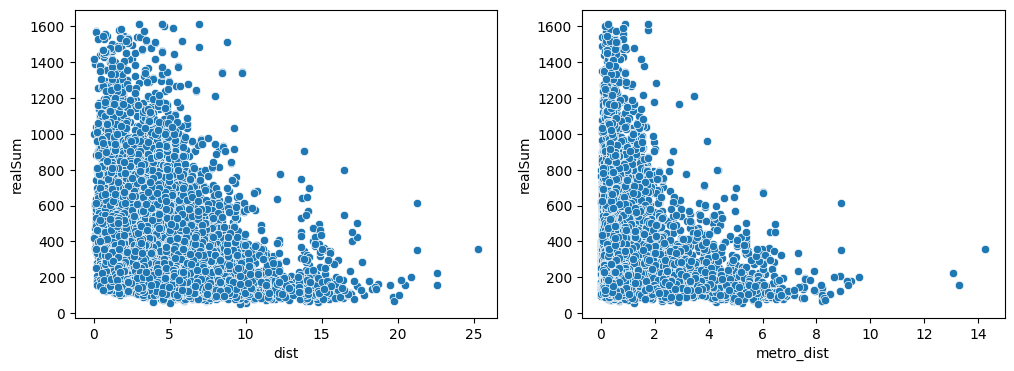

In [138]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))

data_new = data[(data['realSum'] > (data['realSum'].mean() -
                                    3 * data['realSum'].std())) &
                                     (data['realSum'] < (data['realSum'].mean()
                                     + 3 * data['realSum'].std()))]
for i, col in enumerate(dist_cols):
    sns.scatterplot(x=data_new[col], y=data_new['realSum'], ax=axes[i])

plt.show()

**Вопрос:** есть ли зависимость между этими переменными и ценой? Чем её можно объяснить?

*Подсказка:* подумайте про транспортную доступность.

**Ответ:** Зависимость есть: более близкие к центру и к метро отели стоят дороже, что логично, так как из таких мест удобнее куда-то добираться.

**Задание 7 (1 балл).**

Давайте формализуем наши выводы из прошлого задания - посчитайте коэффициент корреляции этих переменных и цены, а также проверьте статистическую значимость.

Воспользуйтесь одним из коэффициентов из *scipy.stats* (и аргументируйте свой выбор), например:
- [Кендалла-Тау](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html)
- [Пирсона](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html)
- [Спирмана](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html)

Согласуется ли результат с вашими выводами?


In [166]:
from scipy.stats import pearsonr

corr_dist, p_value_dist = pearsonr(data_new['dist'], data_new['realSum'])
corr_metro_dist, p_value_metro_dist = pearsonr(data_new['metro_dist'], data_new['realSum'])

print(f"Коэффициент корреляции Пирсона dist и realSum: {corr_dist}")
print(f"p-value: {p_value_dist:.4f}")
print(f"Коэффициент корреляции Пирсона metro_dist и realSum: {corr_metro_dist}")
print(f"p-value: {p_value_metro_dist:.4f}")

Коэффициент корреляции Пирсона dist и realSum: -0.32774516227391437
p-value: 0.0000
Коэффициент корреляции Пирсона metro_dist и realSum: -0.1785395951712579
p-value: 0.0000


**Ответ:** коэффициент корреляции отрицательный, значит корелляция между ценой и расстоянием до центра/метро отрицательная, как мы и предполагали.

**Задание 8 (1 балл).**

Давайте изучим, как зависит цена от категориальных переменных - может быть, узнаем что-то новое и неочевидное?

Постройте *boxplot*-ы для `realSum` и всех переменных с несколькими группами:
* `person capacity`
* `city`
* `cleanliness rating`
* `bedrooms`

*Совет:* воспользуйтесь данными без выбросов из заданий выше.

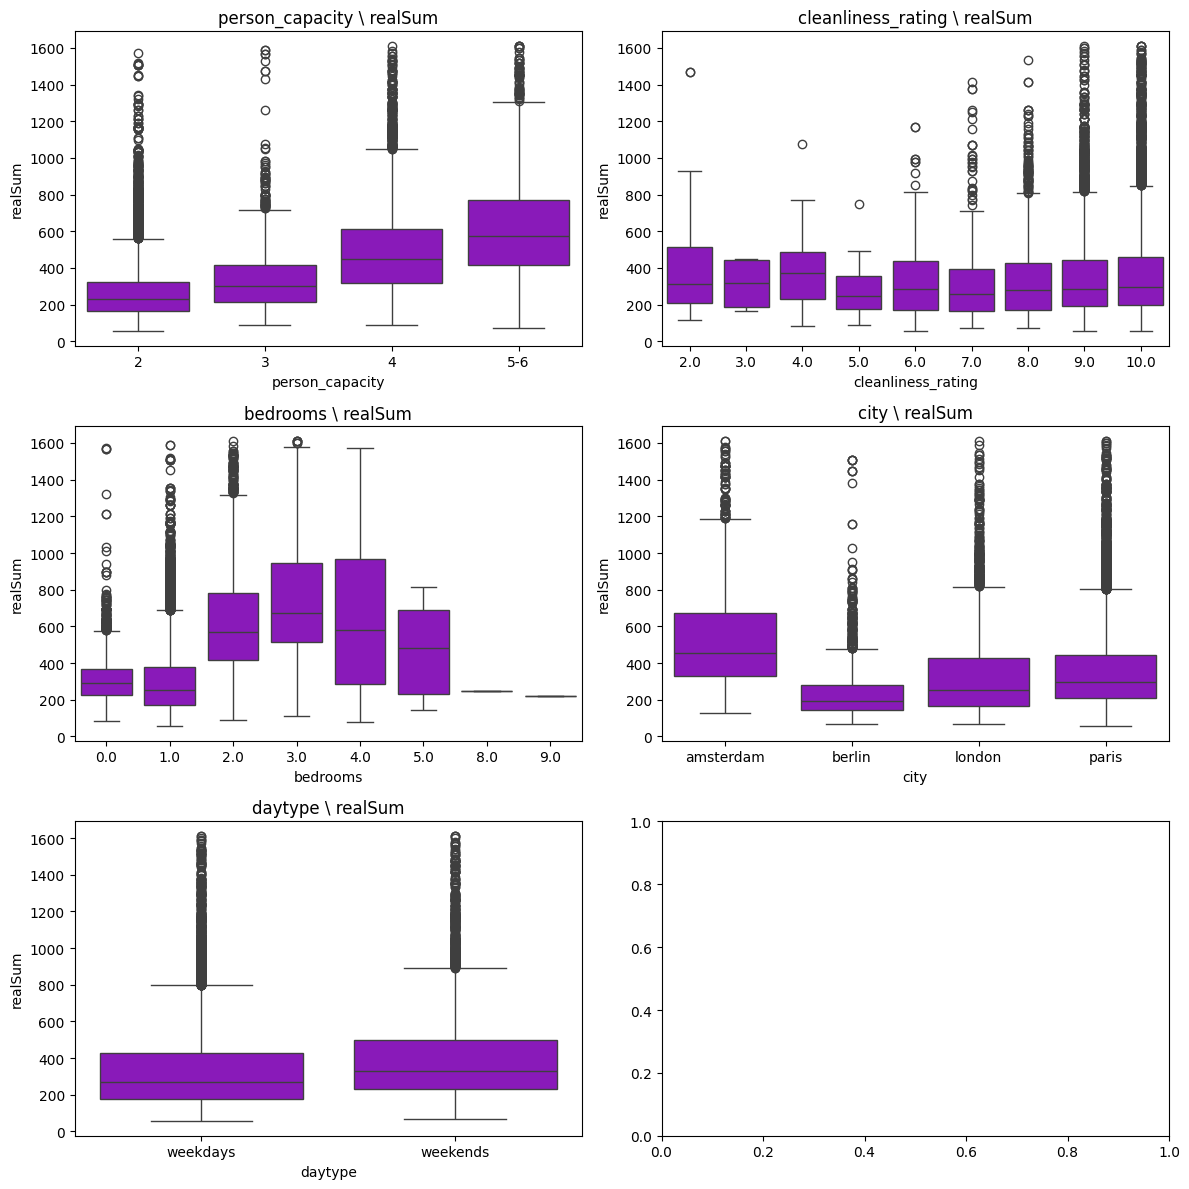

In [172]:
categorical_column_subset = [
    'person_capacity',
    'cleanliness_rating',
    'bedrooms',
    'city',
    'daytype'
    ]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

for i, col in enumerate(categorical_column_subset):
    sns.boxplot(x=col, y='realSum', data=data_new, ax=axes[i//2, i%2], color='darkviolet')
    axes[i//2, i%2].set_title(f'{col} \ realSum')

plt.tight_layout()

plt.show()

**Задание 9 (1 балл).**

Давайте снова формализуем наши выводы из прошлого задания - примените тест Крускала, и не забудьте о статзначимости.

Воспользуйтесь реализацией из *scipy.stats*.

Согласуется ли результат с вашими выводами? - Да, согласуется.


In [183]:
from scipy.stats import kruskal

cols = ['person_capacity', 'cleanliness_rating', 'bedrooms', 'daytype', 'city']

for col in cols:
    groups = [group[col] for name, group in data_new.groupby(col)]
    krusk = kruskal(*groups)

    print(f"Категориальная переменная: {col}")
    print(f"Статистика Крускала-Уоллиса: {krusk.statistic}")
    print(f"p-value: {krusk.pvalue}")


Категориальная переменная: person_capacity
Статистика Крускала-Уоллиса: 21060.0
p-value: 0.0
Категориальная переменная: cleanliness_rating
Статистика Крускала-Уоллиса: 21060.000000000004
p-value: 0.0
Категориальная переменная: bedrooms
Статистика Крускала-Уоллиса: 21060.000000000004
p-value: 0.0
Категориальная переменная: daytype
Статистика Крускала-Уоллиса: 21060.0
p-value: 0.0
Категориальная переменная: city
Статистика Крускала-Уоллиса: 21060.000000000007
p-value: 0.0


## Часть 3. Доверительные интервалы и тесты

Точечные оценки средних - это неплохой источник информации, но даже по диаграммам выше мы видим, что разброс цен от среднего на самом деле бывает очень разным.

Давайте построим несколько интервальных оценок - так, есть две формулы для доверительных интервалов для среднего:

1. асимтотический доверительный интервал (z-интервал)

$$\theta \in \bigg(\overline{X}-\frac{S}{\sqrt{n}}z_{(1+\alpha)/2},\ \overline{X}+\frac{S}{\sqrt{n}}z_{(1+\alpha)/2}\bigg)$$

2. точный неасимптотический (t-интервал)

$$\theta \in \bigg(\overline{X} - \frac{S}{\sqrt{n-1}}T_{n-1, (1+\alpha)/2},\ \overline{X} + \frac{S}{\sqrt{n-1}}T_{n-1, (1+\alpha)/2}\bigg)$$


Здесь $z_{\alpha}$ - это $\alpha$-квантиль нормального распределения, а $T_{n, \alpha}$ - это $\alpha$-квантиль распределения Стьюдента с $n$ степенями свободы.

**Задание 10 (2.5 балла).**
Сделайте функцию для построения обоих доверительных интервалов. Постройте с помощью неё доверительные интервалы для среднего, t-интервал визуализируйте на гистограмме распределения цен. Сильно ли они отличаются? Почему?

*Подсказка:* в пакете `statsmodels.stats.weightstats` есть функции `_zconfint_generic`, `_tconfint_generic` - можно использовать их для проверки.

In [205]:
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic

def confint(sample: pd.Series | np.ndarray,
            alpha: float = 0.05,
            int_type: str = 'asymptotic'
            ) -> tuple[float, float, float]:
    assert int_type in ('asymptotic', 'exact')

    mean = np.mean(sample)
    std = np.std(sample, ddof=1)
    n = len(sample)

    z_interval = _zconfint_generic(mean, std, alpha, 'two-sided')
    t_interval = _tconfint_generic(mean, std/((n)**0.5), n-1, alpha, 'two-sided')

    if int_type == 'asymptotic':
        left, right = z_interval
    else:
        left, right = t_interval

    return left, right

In [229]:
np.random.seed(42)
data_1 = pd.DataFrame({
    'realSum': np.concatenate([np.random.normal(100, 20, 500), np.random.normal(400, 50, 50)])
})

def filter_outliers(data1, col):
    mean = data1[col].mean()
    std = data1[col].std()
    left = mean - 3 * std
    right = mean + 3 * std
    return data1[(data1[col] >= left) & (data1[col] <= right)]

filtered_data = filter_outliers(data, 'realSum')

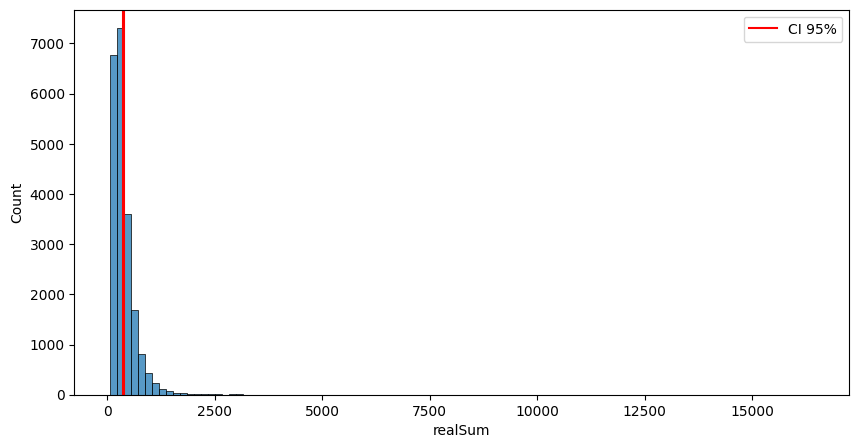

In [230]:
plt.figure(figsize=(10, 5))
sns.histplot(data['realSum'], bins=100)

ci = confint(data['realSum'], int_type='exact', alpha=0.05)
plt.axvline(x=ci[0], color='red')
plt.axvline(x=ci[1], color='red', label='CI 95%')
plt.legend()

plt.show()

**Задание 11 (0.5 балла).**
Постройте доверительные интервалы с уровнем доверия 0.95 для средней цены для бронирований в выходные и будни - у вас получится две подвыборки и два интервала.

Пересекаются ли они? Какой можно сделать из этого вывод?

**Ответ:** не пересекаются, значитесть статистически значимые различия между средними ценами в разные типы дней.

In [234]:
data_1 = data[data['daytype'] == 'weekdays']
data_2 = data[data['daytype'] == 'weekends']
ci_weekdays = confint(data_1['realSum'], int_type='exact', alpha=0.05)
ci_weekends = confint(data_2['realSum'], int_type='exact', alpha=0.05)

print("weekdays:", ci_weekdays)
print("weekends:", ci_weekends)

weekdays: (352.26100101229684, 366.66738037736314)
weekends: (411.43038622457, 427.47729280214327)


**Задание 12 (2 балла).**
Для проверки различных гипотез часто используют статистические тесты.
Давайте воспользуемся одним из них, а именно Т-тестом Стьюдента.

Для начала проведите "А/А тест", чтобы убедиться, что для нашего распределения этот статистический тест подходит:
* Сгененерируйте случайные подвыборки из распределения цен
* Примените к ним Т-тест, сохраните получившийся `pvalue`
* Проведите такой эксперимент много раз.

Так мы получим результаты сравнения двух случайных выборок из одного распределения - значит нулевая гипотеза не должна отвергаться.
Мы можем проверить это следующим образом:
* Выберем уровень ошибки первого рода $\alpha$, он же трешхолд для p-value в наших экспериментах.
* При проведении теста, если все предположения о данных выполнены (вспомните, какие есть предположения о данных у Т-теста?), мы должны получать p-value < $\alpha$ только в $\alpha$ случаев.
* Мы можем отрисовать эмпирическую функцию распределения результатов и посмотреть, выполняется ли это для всех $\alpha$ - должна получиться примерно прямая линия из `(0, 0)` в `(1, 1)`.

Мы оставляем для вас функцию отрисовывания кривой по массиву с p-value из экспериментов, остальное - на вас! Можете провести разное количество экспериментов с разным размером выборки, чтобы убедиться, что тест подходит.

In [232]:
def plot_cdf(data):
    sorted_data = np.sort(data)
    position = sps.rankdata(sorted_data, method='ordinal')
    cdf = position / data.shape[0]

    sorted_data = np.hstack((sorted_data, 1))
    cdf = np.hstack((cdf, 1))

    plt.plot(sorted_data, cdf, linestyle='solid')
    plt.grid()
    plt.title('A/A: p-value CDF under H0')
    plt.show()

In [226]:
from scipy.stats import ttest_ind

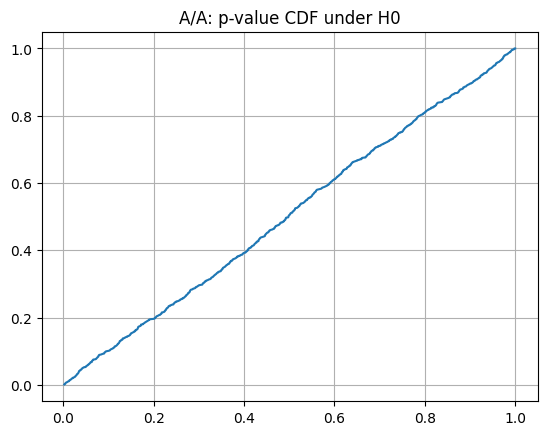

In [227]:
pvalues = []
np.random.seed(42)
n_experiments = 1000
n_subset = 3000

for i in range(n_experiments):

    subset1 = np.random.choice(data['realSum'], size=n_subset, replace=True)
    subset2 = np.random.choice(data['realSum'], size=n_subset, replace=True)

    tstat, pval = ttest_ind(subset1, subset2)

    pvalues.append(pval)

plot_cdf(np.array(pvalues))

Отлично, мы можем пользоваться Т-тестом Стьюдента! Давайте применим его и сравним:
* цены у обычных хозяев и у суперхозяев
* цены на квартиры и на отдельные комнаты

Можете также построить boxplot-ы и доверительные интервалы, если хотите.

До проведения теста напишите, какие по вашему мнению будут результаты и почему?

**Ответ:**

In [222]:
data['room_type'].unique().tolist(), data['host_is_superhost'].unique().tolist()

(['room', 'entire home/apt'], [False, True])

In [ ]:
# YOUR CODE HERE ¯\_(ツ)_/¯

## Часть 4. Бонус

**Задание 13 (0.5 балла).**

По желанию сделайте любые дополнительные тесты и визуализации, а затем напишите, какие выводы и гипотезы можно сделать из наших исследований.
- Что из исследованных переменных значимо влияет на цену бронирования?
- Что происходит при росте расстояния до ближайшего метро?
- Можно ли выделить полезную информацию из оценок чистоты? Почему так могло получиться?
- **И главный вопрос: в какой город лучше поехать отдыхать?**


**Ответ:**

**Задание 14 (0 баллов).**

Вставьте сюда ваш любимый мем!
